In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### Usamos los datos que han sido procesados anteriormente

In [2]:
df = pd.read_csv('Topo_mean.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
flow = df['Flow'].to_numpy()
temps = df['Temps'].to_numpy()
pr = df['Pr'].to_numpy()
dates = df['Date'].to_numpy()
df

,Date,Flow,Temps,Pr
0,1958-01-31,0.629797,-9.278929,1.961500
1,1958-02-28,0.587594,-12.514607,1.183643
2,1958-03-31,0.568484,-9.787065,0.122613
3,1958-04-30,4.465059,-1.451500,1.738533
4,1958-05-31,16.584016,3.987839,2.387806
...,...,...,...,...
691,2015-08-31,11.422987,11.614258,3.755484
692,2015-09-30,28.201833,8.135533,6.864033
693,2015-10-31,2.733366,3.146645,0.336548
694,2015-11-30,3.136748,-0.575233,1.947133


### Gráfica de Flow con respecto al tiempo

In [3]:
fig = go.Figure(data=go.Scatter(x= dates,y= flow))
fig.update_layout(xaxis_title="Years", yaxis_title="Flow")
fig.show()

### Usamos el método de la ventana deslizante para transformar los datos de una dimensión, a tres dimensiones.

In [4]:
from gtda.time_series import SingleTakensEmbedding

embedding_dimension_periodic = 3
embedding_time_delay_periodic = 8
stride = 2

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

flow_periodic_embedded = embedder_periodic.fit_transform(df['Flow'])
pr_periodic_embedded = embedder_periodic.fit_transform(df['Temps'])
temp_periodic_embedded = embedder_periodic.fit_transform(df['Pr'])

print(f"Shape of flow embedded time series: {df['Flow'].shape}")
print(f"Shape of temperature embedded time series: {df['Temps'].shape}")
print(f"Shape of precipitation embedded time series: {df['Pr'].shape}")

Shape of flow embedded time series: (696,)
Shape of temperature embedded time series: (696,)
Shape of precipitation embedded time series: (696,)


#### Nube de puntos de nuestras variables

In [5]:
from gtda.plotting import plot_point_cloud

plot_point_cloud(flow_periodic_embedded)

In [6]:
plot_point_cloud(pr_periodic_embedded)

In [7]:
plot_point_cloud(temp_periodic_embedded)

##### Diagramas de persistencia de las nubes de puntos anteriores

In [8]:
from gtda.homology import VietorisRipsPersistence

flow_periodic_embedded = flow_periodic_embedded[None, :, :]
pr_periodic_embedded = pr_periodic_embedded[None, :, :]
temp_periodic_embedded = temp_periodic_embedded[None, :, :]


# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

periodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for flow periodic signal")
periodic_persistence.fit_transform_plot(flow_periodic_embedded)
plt.show()

Persistence diagram for flow periodic signal


In [9]:
print("Persistence diagram for precipitation periodic signal")
periodic_persistence.fit_transform_plot(pr_periodic_embedded)
plt.show()

Persistence diagram for precipitation periodic signal


In [10]:
print("Persistence diagram for temperature periodic signal")
periodic_persistence.fit_transform_plot(temp_periodic_embedded)
plt.show()

Persistence diagram for temperature periodic signal


### Análisis de Autocorrelación de las variables

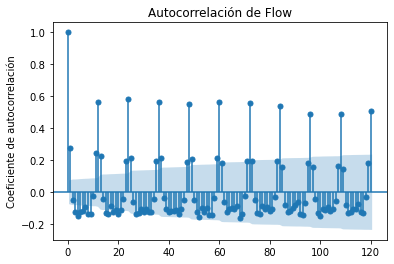

In [11]:
from statsmodels.graphics import tsaplots

# Stands for Time Series Analysis Plots (TSA Plots)
tsaplots.plot_acf(df['Flow'], lags=120)
plt.title('Autocorrelación de Flow')
plt.ylabel("Coeficiente de autocorrelación")
plt.show()

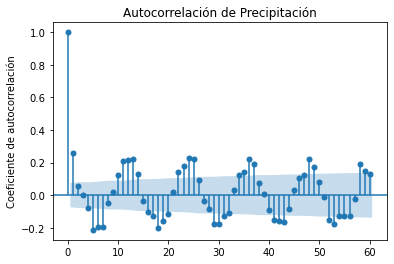

In [12]:
# Stands for Time Series Analysis Plots (TSA Plots)
tsaplots.plot_acf(df['Pr'], lags=60)
plt.title('Autocorrelación de Precipitación')
plt.ylabel("Coeficiente de autocorrelación")
plt.show()

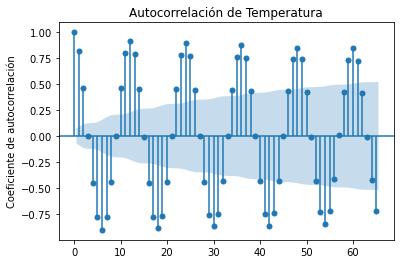

In [13]:
tsaplots.plot_acf(df['Temps'], lags=65)
plt.title('Autocorrelación de Temperatura')
plt.ylabel("Coeficiente de autocorrelación")
plt.show()

### Descomposición de Series Temporales

##### Separamos los datos por años

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [15]:
años = np.array_split(df, 58)
años[-1]


,Date,Flow,Temps,Pr
684,2015-01-31,1.758843,-3.869871,2.447323
685,2015-02-28,1.341762,-2.796464,1.046071
686,2015-03-31,3.233939,-0.817484,1.429323
687,2015-04-30,9.029184,2.237767,0.390700
688,2015-05-31,16.224756,4.302484,2.755806
689,2015-06-30,7.527383,9.417767,1.908100
690,2015-07-31,5.114448,12.435839,3.365935
691,2015-08-31,11.422987,11.614258,3.755484
692,2015-09-30,28.201833,8.135533,6.864033
693,2015-10-31,2.733366,3.146645,0.336548


In [16]:
df_last = pd.concat(años[53:58])
df_first = pd.concat(años[0:5])

In [17]:
flow_result_first=seasonal_decompose(df_first['Flow'], model='multiplicable', period=12)
temp_result_first=seasonal_decompose(df_first['Temps'], model='additive', period=12)
pr_result_first=seasonal_decompose(df_first['Pr'], model='additive', period=12)

In [18]:
flow_result_last=seasonal_decompose(df_last['Flow'], model='multiplicable', period=12)
temp_result_last=seasonal_decompose(df_last['Temps'], model='additive', period=12)
pr_result_last=seasonal_decompose(df_last['Pr'], model='additive', period=12)

##### Descomposición de los últimos 5 años

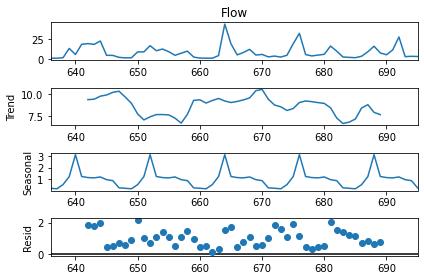

In [19]:
flow_result_last.plot()
plt.show()

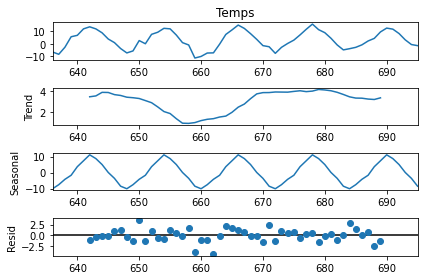

In [20]:
temp_result_last.plot()
plt.show()

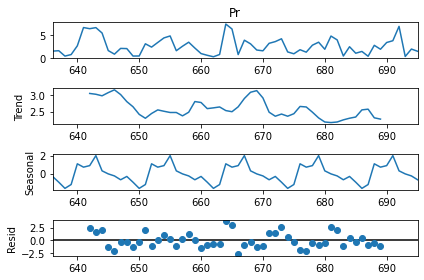

In [21]:
pr_result_last.plot()
plt.show()

##### Descomposición de los primeros 5 años

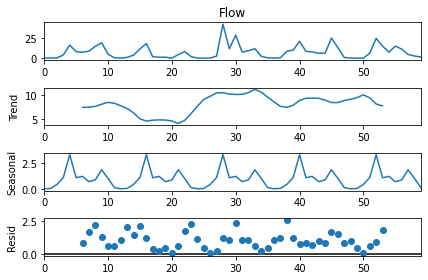

In [22]:
flow_result_first.plot()
plt.show()

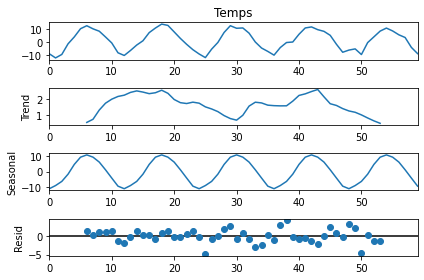

In [23]:
temp_result_first.plot()
plt.show()

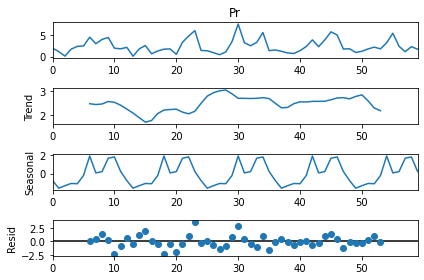

In [24]:
pr_result_first.plot()
plt.show()